## import necessary libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [108]:
df = pd.read_csv('titanic.csv')

In [109]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [110]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Data Cleaning

### 1) check for duplicates and handle them
### 2) check for missing values and handle them
### 3) check for invalid datatypes and handle them
### 4) Remove the unwanted columns

In [112]:
df.duplicated().any() # no duplicates are exists

False

In [113]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

### age,fare - *mean/median/zero*
### embarked - *mode/unknown*
### cabin - *drop the column/unknown*

<Axes: xlabel='age'>

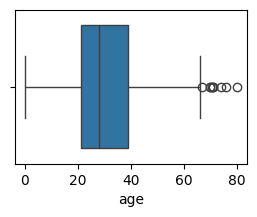

In [114]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'age')

<Axes: xlabel='fare'>

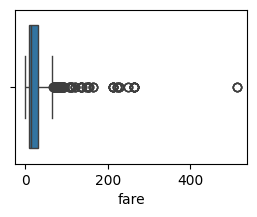

In [115]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'fare')

In [116]:
df.describe()
# mean --> average
# median --> middle
# mode --> most occured

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [117]:
df['age'] = df['age'].fillna(28.0) # median(50%) -- df['age'].median() ---> fillna works with series
df['fare'] = df['fare'].fillna(14.45) # median(50%) -- df['fare'].median()

In [118]:
df['embarked'].mode() # return type is series

0    S
Name: embarked, dtype: object

In [119]:
# --- IGNORE --- index
m = df['embarked'].mode()[0] # 'S'
df['embarked'] = df['embarked'].fillna(m)

In [120]:
df.info() # everything is handled except cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [121]:
# df.dropna(axis=1,inplace=True) # drop the cabin column
df = df.dropna(axis = 1)
df # return type is dataframe

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


### there is no invaid datatype in this dataset Data Cleaning step is done

## Data Transformation (Feature Engineering)

### 1) create the new columns from an exisiting columns for data analysis
### 2) Remove the unwanted columns after feature engineering

In [122]:
df['pclass'].duplicated().sum()

1306

In [123]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [124]:
df['name'].str.split(',',expand=True) # str is a helping attribute # expand automatically create list

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
4,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Zabour,Miss. Hileni
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin


In [125]:
df[['lname','temp']]=df['name'].str.split(',',expand=True)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin


In [126]:
df['temp'].str.split('.',expand=True,n=1)

,0,1
0,Miss,Elisabeth Walton
1,Master,Hudson Trevor
2,Miss,Helen Loraine
3,Mr,Hudson Joshua Creighton
4,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Miss,Hileni
1305,Miss,Thamine
1306,Mr,Mapriededer
1307,Mr,Ortin


In [127]:
df[['courtesy_title','fname']]=df['temp'].str.split('.',expand=True,n=1)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)


In [128]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [129]:
for col in ['age','fare']:
    # print(df[col].round(1))
    df[col]=df[col].round(1)

In [130]:
df=df.drop(columns=['name','temp'])
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [131]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pclass          1309 non-null   int64  
 1   sex             1309 non-null   object 
 2   age             1309 non-null   float64
 3   sibsp           1309 non-null   int64  
 4   parch           1309 non-null   int64  
 5   ticket          1309 non-null   object 
 6   fare            1309 non-null   float64
 7   embarked        1309 non-null   object 
 8   survived        1309 non-null   int64  
 9   lname           1309 non-null   object 
 10  courtesy_title  1309 non-null   object 
 11  fname           1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [133]:
df.columns[[1,9,10,11]]

Index(['sex', 'lname', 'courtesy_title', 'fname'], dtype='object')

In [134]:
# for col in df.columns[[1,9,10,11]]:
#     df[col] = df[col].astype(str).str.title()

In [135]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [136]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [137]:
dict={'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}

In [138]:
df['embarked']=df['embarked'].replace(dict)
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin


In [139]:
df['fam_cnt']=df['sibsp']+df['parch']
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt
0,1,female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton,0
1,1,male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3
2,1,female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3
3,1,male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3
4,1,female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni,1
1305,3,female,28.0,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine,1
1306,3,male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0
1307,3,male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0


In [140]:
df=df.sort_values(by='ticket')

In [141]:
ticket_cnt_df=df['ticket'].value_counts().reset_index()
ticket_cnt_df

,ticket,count
0,CA. 2343,11
1,1601,8
2,CA 2144,8
3,3101295,7
4,347077,7
...,...,...
924,342826,1
925,343095,1
926,343120,1
927,343271,1


In [142]:
pd.merge(df,ticket_cnt_df)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [143]:
df=pd.merge(df,ticket_cnt_df,on='ticket',how='inner')
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [ ]:
# df.drop(['count_x', 'count_y'], axis=1, inplace=True)

In [145]:
df=df.rename(columns={'count':'ps_count'})
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,ps_count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


## Data Analysis

### 1) Analysis Using Pandas
### 2) Analysing using visuals (matplotlib and seaborn)

## conclusion